In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [2]:
import decoding_analysis_vis as dav
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import scipy
import xarray as xr
sns.set_palette('colorblind')

In [5]:
AllSesDict = {xx: dav.AllSessions(memory_efficient=True, sess_type=xx) for xx in ['sens', 'proj']}

session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons
session name : 2020-09-08_RL099.pkl
Excluded 276 out of 2095 neurons
session name : 2020-09-14_RL101.pkl
Excluded 602 out of 2169 neurons
session name : 2020-09-16_RL103.pkl
Excluded 461 out of 2106 neurons
session name : 2020-10-02_RL108.pkl
Excluded 969 out of 2563 neurons
session name : 2020-10-12_RL109.pkl
Excluded 843 out of 2515 neurons
Individual sessions loaded
session name : 2021-02-18_RL127.pkl
Excluded 833 out of 2334 neurons
session name : 2021-02-22_RL128.pkl
Excluded 893 out of 2308 neurons
session name : 2021-02-23_RL129.pkl
Excluded 1323 out of 2364 neurons
session name : 2021-02-24_RL132.pkl
Excluded 757 out of 2156 neurons
session name : 2021-02-25_RL131.pkl
Excluded 1361 out of 2448 neurons
session name : 2021-03-02_RL130.pkl
Excluded 518 out of 2258 neurons
Individual sessions loaded


In [4]:
# tmp = dav.SimpleSession(verbose=1, session_id=0, 
#                         shuffle_trial_labels=False,
#                         shuffle_timepoints=False,
#                         shuffle_all_data=False,
#                         prestim_baseline=False,
#                         bool_filter_neurons=True)

tmp = None                        

In [29]:
# tmpr = tmp.dataset_selector(region='s1', min_t=-0.9, max_t=1.9, trial_type_list=['sensory', 'random'], 
#                             deepcopy=True, remove_added_dimensions=True)  
tmpr = tmp.dataset_selector(region='s1', frame_id=78, trial_type_list=['sensory', 'random'], 
                            deepcopy=True, remove_added_dimensions=True)  


In [30]:

tmpr# = tmpr.assign(frame_array=tmpr.frame_array.astype('int'))  

<xarray.Dataset>
Dimensions:          (neuron: 1021, time: 42, trial: 200)
Coordinates:
  * neuron           (neuron) int64 0 2 8 9 10 13 ... 1788 1789 1790 1792 1793
  * time             (time) float64 -0.8587 -0.7918 -0.7248 ... 1.819 1.885
  * trial            (trial) int64 0 1 2 3 4 5 6 ... 193 194 195 196 197 198 199
Data variables:
    activity         (neuron, time, trial) float32 0.8945 -0.5316 ... 2.281
    cell_s1          (neuron) bool True True True True ... True True True True
    cell_id          (neuron) int64 0 2 8 9 10 13 ... 4147 4148 4149 4154 4156
    trial_type       (trial) object 'sensory' 'sensory' ... 'random' 'random'
    frame_array      (time) int64 18 19 20 21 22 23 24 ... 53 54 55 56 57 58 59
    targets_sensory  (neuron) bool False False False False ... False False False
    targets_random   (neuron) bool False False False False ... False False True

In [33]:
tmpr.where(tmpr.frame_array == 45, drop=True)

<xarray.Dataset>
Dimensions:          (neuron: 1021, time: 1, trial: 200)
Coordinates:
  * neuron           (neuron) int64 0 2 8 9 10 13 ... 1788 1789 1790 1792 1793
  * time             (time) float64 0.9484
  * trial            (trial) int64 0 1 2 3 4 5 6 ... 193 194 195 196 197 198 199
Data variables:
    activity         (neuron, time, trial) float32 -0.1653 -0.7023 ... 2.466
    cell_s1          (neuron, time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    cell_id          (neuron, time) float64 0.0 2.0 8.0 ... 4.154e+03 4.156e+03
    trial_type       (trial, time) object 'sensory' 'sensory' ... 'random'
    frame_array      (time) float64 45.0
    targets_sensory  (neuron, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    targets_random   (neuron, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 1.0

In [6]:
tt_list_dict = {'sens': ['sham', 'sensory', 'random'],
                'proj': ['sham', 'projecting', 'non_projecting']}

selected_data_dict = {}
for xx in ['sens', 'proj']:
    for reg in ['s1', 's2']:
        print(f'Now selecting {xx} in {reg}')
        selected_data_dict[f'{xx}_{reg}'] = AllSesDict[xx].dataset_selector(AllSesDict[xx], region=reg, min_t=-2, max_t=6, 
                                                                        trial_type_list=tt_list_dict[xx])

Now selecting sens in s1
Now selecting sens in s2
Now selecting proj in s1
Now selecting proj in s2


In [40]:
reg = 's2'

In [41]:
selected_data_dict[f'{xx}_{reg}'] = AllSesDict[xx].dataset_selector(AllSesDict[xx], region=reg, min_t=-2, max_t=6, 
                                                                        trial_type_list=tt_list_dict[xx])

MemoryError: Unable to allocate 922. MiB for an array with shape (3357, 120, 300) and data type float64

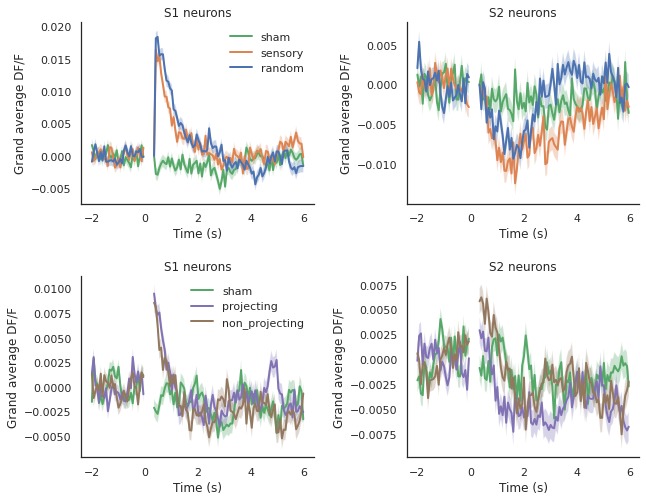

In [8]:
fig, ax_av = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})


for i_xx, xx in enumerate(['sens', 'proj']):
    for i_reg, reg in enumerate(['s1', 's2']):
        curr_ax = ax_av[i_xx, i_reg]
        dav.plot_grand_average(ds=selected_data_dict[f'{xx}_{reg}'], ax=curr_ax, smooth_mean=False,
                               tt_list=tt_list_dict[xx], plot_legend=(reg == 's1'))
        curr_ax.set_title(f'{reg.upper()} neurons')

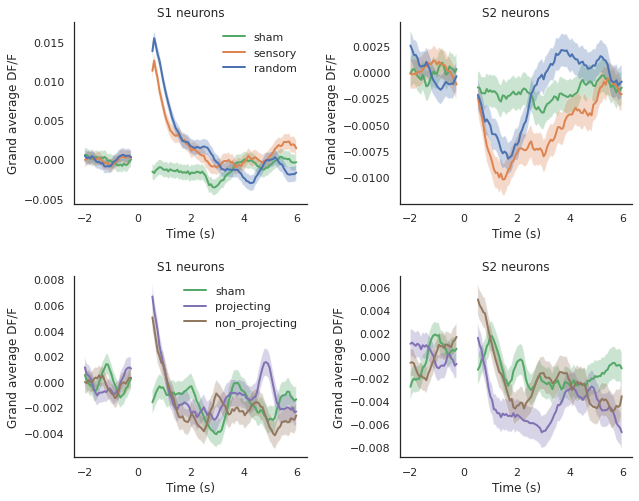

In [90]:
fig, ax_av = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})


for i_xx, xx in enumerate(['sens', 'proj']):
    for i_reg, reg in enumerate(['s1', 's2']):
        curr_ax = ax_av[i_xx, i_reg]
        dav.plot_grand_average(ds=selected_data_dict[f'{xx}_{reg}'], ax=curr_ax, smooth_mean=True,
                               tt_list=tt_list_dict[xx], plot_legend=(reg == 's1'))
        curr_ax.set_title(f'{reg.upper()} neurons')

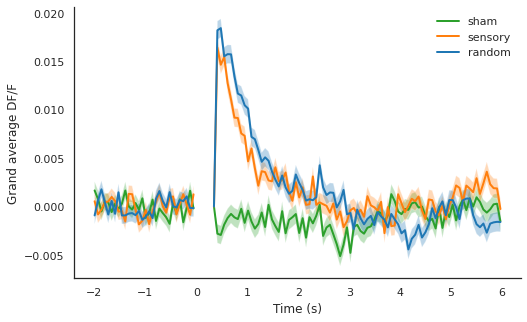

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

xx = 'sens'
reg = 's1'
dav.plot_grand_average(ds=selected_data_dict[f'{xx}_{reg}'], ax=ax, smooth_mean=False,
                       tt_list=tt_list_dict[xx], plot_legend=True)

In [11]:
selected_data_dict[f'{xx}_{reg}']

<xarray.Dataset>
Dimensions:                (neuron: 6735, time: 120, trial: 300)
Coordinates:
  * time                   (time) float64 -1.997 -1.93 -1.863 ... 5.901 5.968
  * neuron                 (neuron) int64 0 2 8 9 10 ... 10088 10089 10090 10091
  * trial                  (trial) int64 0 1 2 3 4 5 ... 294 295 296 297 298 299
Data variables:
    activity               (neuron, time, trial) float32 -0.7716 ... 0.05391
    cell_s1                (neuron) bool True True True True ... True True True
    cell_id                (neuron) int64 0 2 8 9 10 ... 4369 4370 4374 4378
    trial_type             (trial) object 'sensory' 'sensory' ... 'sham' 'sham'
    frame_array            (time) int64 1 2 3 4 5 6 ... 115 116 117 118 119 120
    targets_sensory        (neuron) bool False False False ... False True False
    targets_random         (neuron) bool False False False ... False False False
    original_neuron_index  (neuron, time, trial) float64 0.0 0.0 ... 1.671e+03

In [38]:
# AllSesDict['sens'].full_ds.cell_s1.dims
all_vars = list(dict(AllSesDict['sens'].full_ds.variables).keys())

for var_name in all_vars:
    print(var_name)
    print(AllSesDict['sens'].full_ds[var_name].dtype)

time
float64
neuron
int64
trial
int64
activity
float32
cell_s1
bool
cell_id
int64
trial_type
<U7
frame_array
int64
targets_sensory
bool
targets_random
bool
original_neuron_index
int64
